# IntPic

This is a notebook showing some drawings related to numerical semigroups produced with the package [IntPic](https://www.gap-system.org/Packages/intpic.html).

We start by loading the package and setting the scale to 1.5, so that the pictures show bigger in the notebook.

In [2]:
LoadPackage("IntPic");
IP_TikzDefaultOptionsForArraysOfIntegers.scale:="1.5";;

true

Next we emphasize the "small elements" of the numerical semigroup $\langle 5,7\rangle$.

In [5]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
JupyterSplashTikZ(tkz);

We can modify the options to display the semigroup on a table instead.

In [9]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
JupyterSplashTikZ(tkz);

In [13]:
opts := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"]);;
highlights := ["conductor", "min_generators", "small_elements"];;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,opts);;
JupyterSplashTikZ(tkz);

In [18]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
JupyterSplashTikZ(tkz);

The problem is that the output will not be shown on the GitHub previewer. A solution is to use picture to have a svg fallback.

In [19]:
jstpng:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, svgdata, svgfile, stream, pngdata, tojupyter, hasbp, img, b64file, b64cmd, pdffile, dimsfile, dims;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    pngfile := Concatenation( fn, ".png" );
    ltx := Concatenation( "pdftoppm -png -r 300", Concatenation( fn, ".pdf" ), " >> ", pngfile );
    Exec( ltx );
    
    if not( IsExistingFile( pngfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No png was created; pdftoppm is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; pdf2svg is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata:= ReadAll( stream );
    CloseStream( stream );
    ltx := Concatenation( b64cmd, pngfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    pngdata:= ReadAll( stream );
    CloseStream( stream );

    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"'>"); testing separately
    #img:=Concatenation("<img src='data:image/png;base64,",pngdata,"'>");
    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"' onerror=\"this.src='data:image/png;base64,",pngdata,"'\"     alt='TikZ picture'>"); #onerror does not work on github
    img:=Concatenation("<img srcset='data:image/svg+xml;base64,",svgdata,"' src='data:image/png;base64,",pngdata,"' alt='TikZ picture'>");
    img:=Concatenation("<picture>\n <source type=\"image/svg+xml\" srcset=\"data:image/svg+xml;base64,",svgdata,"\">\n <img src=\"data:image/png;base64,",pngdata,"\">\n </picture>");

    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end

The problem is that depending on the operating system, it always falls back to the png image...

In [24]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstpng(tkz);

In [28]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
jstpng(tkz);

In [31]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstpng(tkz);

In [32]:
jstalt:= function(tikz)
    local tmpdir, fn, header, ltx, svgdata, svgdata64, svgfile, stream, tojupyter, hasbp, img, b64file, b64cmd;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; pdf2svg is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata64:= ReadAll( stream );
    CloseStream( stream );
    stream := InputTextFile( svgfile );
    svgdata:= ReadAll( stream );
    svgdata:=svgdata{[PositionSublist(svgdata,"<svg")..Length(svgdata)]};
    #PrintFormattedString(svgdata);
    CloseStream( stream );

    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"'>"); testing separately
    #img:=Concatenation("<img src='data:image/png;base64,",pngdata,"'>");
    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"' onerror=\"this.src='data:image/png;base64,",pngdata,"'\"     alt='TikZ picture'>"); #onerror does not work on github
    img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata64,"' srcset='data:image/svg+xml;ascii,",svgdata,"' alt='TikZ picture'>");


    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end

In [36]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
jstalt(tkz);

<path d="M 1.890625 -1.15625 L 3.484375 -2.6875 C 5.8125 -4.75 6.703125 -5.5625 6.703125 -7.046875 C 6.703125 -8.75 5.359375 -9.953125 3.546875 -9.953125 C 1.859375 -9.953125 0.75 -8.578125 0.75 -7.25 C 0.75 -6.40625 1.5 -6.40625 1.53125 -6.40625 C 1.796875 -6.40625 2.3125 -6.59375 2.3125 -7.203125 C 2.3125 -7.59375 2.046875 -7.984375 1.53125 -7.984375 C 1.40625 -7.984375 1.375 -7.984375 1.328125 -7.96875 C 1.671875 -8.9375 2.484375 -9.484375 3.34375 -9.484375 C 4.703125 -9.484375 5.34375 -8.28125 5.34375 -7.046875 C 5.34375 -5.859375 4.59375 -4.671875 3.78125 -3.75 L 0.90625 -0.546875 C 0.75 -0.390625 0.75 -0.359375 0.75 0 L 6.28125 0 L 6.703125 -2.59375 L 6.328125 -2.59375 C 6.265625 -2.15625 6.15625 -1.5 6 -1.265625 C 5.90625 -1.15625 4.921875 -1.15625 4.578125 -1.15625 Z M 1.890625 -1.15625 "/>
 
 
<path d="M 4.390625 -2.46875 L 4.390625 -1.171875 C 4.390625 -0.625 4.359375 -0.46875 3.25 -0.46875 L 2.9375 -0.46875 L 2.9375 0 C 3.5625 -0.046875 4.328125 -0.046875 4.953125 -0.046875 C 5.59375 -0.046875 6.375 -0.046875 6.984375 0 L 6.984375 -0.46875 L 6.671875 -0.46875 C 5.578125 -0.46875 5.546875 -0.625 5.546875 -1.171875 L 5.546875 -2.46875 L 7.03125 -2.46875 L 7.03125 -2.921875 L 5.546875 -2.921875 L 5.546875 -9.71875 C 5.546875 -10.015625 5.546875 -10.109375 5.296875 -10.109375 C 5.171875 -10.109375 5.125 -10.109375 5 -9.9375 L 0.421875 -2.921875 L 0.421875 -2.46875 Z M 4.484375 -2.921875 L 0.84375 -2.921875 L 4.484375 -8.5 Z M 4.484375 -2.921875 "/>
 
 
<path d="M 6.703125 -3 C 6.703125 -4.78125 5.484375 -6.28125 3.875 -6.28125 C 3.15625 -6.28125 2.515625 -6.03125 1.96875 -5.515625 L 1.96875 -8.421875 C 2.265625 -8.328125 2.765625 -8.234375 3.234375 -8.234375 C 5.078125 -8.234375 6.125 -9.59375 6.125 -9.78125 C 6.125 -9.875 6.078125 -9.953125 5.96875 -9.953125 C 5.953125 -9.953125 5.9375 -9.953125 5.859375 -9.90625 C 5.5625 -9.765625 4.828125 -9.46875 3.828125 -9.46875 C 3.21875 -9.46875 2.546875 -9.578125 1.84375 -9.890625 C 1.71875 -9.9375 1.6875 -9.9375 1.65625 -9.9375 C 1.515625 -9.9375 1.515625 -9.8125 1.515625 -9.578125 L 1.515625 -5.15625 C 1.515625 -4.890625 1.515625 -4.765625 1.71875 -4.765625 C 1.828125 -4.765625 1.859375 -4.8125 1.90625 -4.90625 C 2.078125 -5.140625 2.625 -5.9375 3.84375 -5.9375 C 4.609375 -5.9375 4.984375 -5.265625 5.109375 -4.984375 C 5.34375 -4.4375 5.375 -3.859375 5.375 -3.109375 C 5.375 -2.578125 5.375 -1.6875 5.015625 -1.0625 C 4.65625 -0.484375 4.109375 -0.09375 3.421875 -0.09375 C 2.328125 -0.09375 1.484375 -0.875 1.21875 -1.765625 C 1.265625 -1.75 1.3125 -1.734375 1.484375 -1.734375 C 1.96875 -1.734375 2.21875 -2.109375 2.21875 -2.46875 C 2.21875 -2.828125 1.96875 -3.203125 1.484375 -3.203125 C 1.265625 -3.203125 0.75 -3.09375 0.75 -2.40625 C 0.75 -1.125 1.78125 0.328125 3.453125 0.328125 C 5.1875 0.328125 6.703125 -1.109375 6.703125 -3 Z M 6.703125 -3 "/>
 
 
<path d="M 1.96875 -4.90625 L 1.96875 -5.265625 C 1.96875 -9.03125 3.828125 -9.578125 4.578125 -9.578125 C 4.9375 -9.578125 5.578125 -9.484375 5.90625 -8.984375 C 5.671875 -8.984375 5.078125 -8.984375 5.078125 -8.3125 C 5.078125 -7.84375 5.4375 -7.625 5.765625 -7.625 C 6 -7.625 6.453125 -7.75 6.453125 -8.328125 C 6.453125 -9.234375 5.796875 -9.953125 4.5625 -9.953125 C 2.640625 -9.953125 0.625 -8.015625 0.625 -4.71875 C 0.625 -0.734375 2.359375 0.328125 3.75 0.328125 C 5.40625 0.328125 6.828125 -1.078125 6.828125 -3.046875 C 6.828125 -4.9375 5.5 -6.375 3.84375 -6.375 C 2.828125 -6.375 2.265625 -5.609375 1.96875 -4.90625 Z M 3.75 -0.09375 C 2.8125 -0.09375 2.359375 -0.984375 2.265625 -1.203125 C 2 -1.90625 2 -3.109375 2 -3.375 C 2 -4.546875 2.484375 -6.03125 3.828125 -6.03125 C 4.0625 -6.03125 4.75 -6.03125 5.21875 -5.109375 C 5.484375 -4.5625 5.484375 -3.796875 5.484375 -3.0625 C 5.484375 -2.34375 5.484375 -1.59375 5.234375 -1.0625 C 4.78125 -0.171875 4.09375 -0.09375 3.75 -0.09375 Z M 3.75 -0.09375 "/>
 
 
<path d="M 7.109375 -9.09375 C 7.25 -9.28125 7.25 -9.3125 7.25 -9.625 L 3.609375 -9.625 C 1.796875 -9.625 1.765625 -9.8125 

In [41]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstalt(tkz);

<path d="M 4.328125 -5.265625 C 5.5625 -5.65625 6.421875 -6.703125 6.421875 -7.890625 C 6.421875 -9.109375 5.109375 -9.953125 3.671875 -9.953125 C 2.171875 -9.953125 1.03125 -9.046875 1.03125 -7.921875 C 1.03125 -7.421875 1.359375 -7.140625 1.796875 -7.140625 C 2.25 -7.140625 2.546875 -7.46875 2.546875 -7.90625 C 2.546875 -8.65625 1.859375 -8.65625 1.625 -8.65625 C 2.09375 -9.375 3.078125 -9.578125 3.609375 -9.578125 C 4.234375 -9.578125 5.046875 -9.25 5.046875 -7.90625 C 5.046875 -7.71875 5.015625 -6.859375 4.625 -6.203125 C 4.1875 -5.484375 3.671875 -5.4375 3.296875 -5.421875 C 3.1875 -5.40625 2.828125 -5.375 2.71875 -5.375 C 2.59375 -5.359375 2.5 -5.34375 2.5 -5.203125 C 2.5 -5.03125 2.59375 -5.03125 2.859375 -5.03125 L 3.515625 -5.03125 C 4.734375 -5.03125 5.28125 -4.015625 5.28125 -2.546875 C 5.28125 -0.515625 4.25 -0.09375 3.59375 -0.09375 C 2.953125 -0.09375 1.84375 -0.34375 1.3125 -1.21875 C 1.84375 -1.15625 2.296875 -1.484375 2.296875 -2.046875 C 2.296875 -2.578125 1.890625 -2.890625 1.46875 -2.890625 C 1.109375 -2.890625 0.625 -2.671875 0.625 -2.015625 C 0.625 -0.65625 2.015625 0.328125 3.640625 0.328125 C 5.46875 0.328125 6.828125 -1.03125 6.828125 -2.546875 C 6.828125 -3.78125 5.890625 -4.9375 4.328125 -5.265625 Z M 4.328125 -5.265625 "/>
 
 
<path d="M 2.4375 -6.828125 C 1.75 -7.28125 1.6875 -7.78125 1.6875 -8.03125 C 1.6875 -8.953125 2.65625 -9.578125 3.71875 -9.578125 C 4.8125 -9.578125 5.765625 -8.796875 5.765625 -7.71875 C 5.765625 -6.875 5.1875 -6.15625 4.28125 -5.625 Z M 4.609375 -5.40625 C 5.6875 -5.953125 6.421875 -6.734375 6.421875 -7.71875 C 6.421875 -9.09375 5.09375 -9.953125 3.734375 -9.953125 C 2.234375 -9.953125 1.03125 -8.84375 1.03125 -7.453125 C 1.03125 -7.1875 1.0625 -6.515625 1.6875 -5.8125 C 1.859375 -5.625 2.40625 -5.265625 2.78125 -5 C 1.90625 -4.578125 0.625 -3.734375 0.625 -2.25 C 0.625 -0.671875 2.15625 0.328125 3.71875 0.328125 C 5.40625 0.328125 6.828125 -0.90625 6.828125 -2.515625 C 6.828125 -3.046875 6.65625 -3.71875 6.09375 -4.34375 C 5.8125 -4.65625 5.578125 -4.8125 4.609375 -5.40625 Z M 3.125 -4.78125 L 4.953125 -3.609375 C 5.375 -3.328125 6.078125 -2.890625 6.078125 -1.96875 C 6.078125 -0.859375 4.953125 -0.09375 3.734375 -0.09375 C 2.453125 -0.09375 1.375 -1.015625 1.375 -2.25 C 1.375 -3.125 1.859375 -4.078125 3.125 -4.78125 Z M 3.125 -4.78125 "/>
 
 
<path d="M 5.484375 -4.75 L 5.484375 -4.265625 C 5.484375 -0.78125 3.921875 -0.09375 3.0625 -0.09375 C 2.8125 -0.09375 2 -0.125 1.59375 -0.625 C 2.25 -0.625 2.375 -1.0625 2.375 -1.3125 C 2.375 -1.78125 2.015625 -2 1.6875 -2 C 1.453125 -2 1 -1.859375 1 -1.28125 C 1 -0.28125 1.8125 0.328125 3.078125 0.328125 C 5 0.328125 6.828125 -1.703125 6.828125 -4.921875 C 6.828125 -8.9375 5.109375 -9.953125 3.78125 -9.953125 C 2.953125 -9.953125 2.21875 -9.671875 1.578125 -9 C 0.96875 -8.328125 0.625 -7.703125 0.625 -6.59375 C 0.625 -4.71875 1.9375 -3.25 3.609375 -3.25 C 4.53125 -3.25 5.140625 -3.890625 5.484375 -4.75 Z M 3.625 -3.59375 C 3.390625 -3.59375 2.703125 -3.59375 2.234375 -4.546875 C 1.96875 -5.09375 1.96875 -5.84375 1.96875 -6.578125 C 1.96875 -7.375 1.96875 -8.078125 2.28125 -8.640625 C 2.6875 -9.375 3.25 -9.578125 3.78125 -9.578125 C 4.46875 -9.578125 4.953125 -9.0625 5.21875 -8.390625 C 5.390625 -7.921875 5.453125 -6.96875 5.453125 -6.28125 C 5.453125 -5.046875 4.9375 -3.59375 3.625 -3.59375 Z M 3.625 -3.59375 "/>
 
 
<path d="M 4.390625 -2.46875 L 4.390625 -1.171875 C 4.390625 -0.625 4.359375 -0.46875 3.25 -0.46875 L 2.9375 -0.46875 L 2.9375 0 C 3.5625 -0.046875 4.328125 -0.046875 4.953125 -0.046875 C 5.59375 -0.046875 6.375 -0.046875 6.984375 0 L 6.984375 -0.46875 L 6.671875 -0.46875 C 5.578125 -0.46875 5.546875 -0.625 5.546875 -1.171875 L 5.546875 -2.46875 L 7.03125 -2.46875 L 7.03125 -2.921875 L 5.546875 -2.921875 L 5.546875 -9.71875 C 5.546875 -10.015625 5.546875 -10.109375 5.296875 -10.109375 C 5.171875 -10.109375 5.125 -10.109375 5 -9.9375 L 0.421875 -2.921875 L 0.421875 -2.46875 Z M 4.484375 -2.921875 L 0.84375 -2.921875 L 4

In [44]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstalt(tkz);

<path d="M 6.875 -4.78125 C 6.875 -5.96875 6.796875 -7.171875 6.28125 -8.28125 C 5.59375 -9.703125 4.359375 -9.953125 3.734375 -9.953125 C 2.84375 -9.953125 1.75 -9.5625 1.140625 -8.171875 C 0.65625 -7.140625 0.578125 -5.96875 0.578125 -4.78125 C 0.578125 -3.65625 0.640625 -2.3125 1.25 -1.1875 C 1.890625 0.03125 2.984375 0.328125 3.71875 0.328125 C 4.53125 0.328125 5.65625 0.015625 6.3125 -1.40625 C 6.796875 -2.4375 6.875 -3.59375 6.875 -4.78125 Z M 3.71875 0 C 3.140625 0 2.25 -0.375 1.984375 -1.8125 C 1.828125 -2.703125 1.828125 -4.078125 1.828125 -4.953125 C 1.828125 -5.921875 1.828125 -6.90625 1.9375 -7.703125 C 2.21875 -9.484375 3.34375 -9.625 3.71875 -9.625 C 4.21875 -9.625 5.203125 -9.34375 5.484375 -7.875 C 5.625 -7.03125 5.625 -5.90625 5.625 -4.953125 C 5.625 -3.84375 5.625 -2.828125 5.46875 -1.859375 C 5.25 -0.453125 4.390625 0 3.71875 0 Z M 3.71875 0 "/>
 
 
<path d="M 4.390625 -9.5625 C 4.390625 -9.921875 4.390625 -9.953125 4.046875 -9.953125 C 3.125 -9 1.8125 -9 1.328125 -9 L 1.328125 -8.53125 C 1.625 -8.53125 2.515625 -8.53125 3.28125 -8.921875 L 3.28125 -1.1875 C 3.28125 -0.640625 3.234375 -0.46875 1.890625 -0.46875 L 1.421875 -0.46875 L 1.421875 0 C 1.9375 -0.046875 3.234375 -0.046875 3.84375 -0.046875 C 4.4375 -0.046875 5.734375 -0.046875 6.265625 0 L 6.265625 -0.46875 L 5.78125 -0.46875 C 4.4375 -0.46875 4.390625 -0.625 4.390625 -1.1875 Z M 4.390625 -9.5625 "/>
 
 
<path d="M 1.890625 -1.15625 L 3.484375 -2.6875 C 5.8125 -4.75 6.703125 -5.5625 6.703125 -7.046875 C 6.703125 -8.75 5.359375 -9.953125 3.546875 -9.953125 C 1.859375 -9.953125 0.75 -8.578125 0.75 -7.25 C 0.75 -6.40625 1.5 -6.40625 1.53125 -6.40625 C 1.796875 -6.40625 2.3125 -6.59375 2.3125 -7.203125 C 2.3125 -7.59375 2.046875 -7.984375 1.53125 -7.984375 C 1.40625 -7.984375 1.375 -7.984375 1.328125 -7.96875 C 1.671875 -8.9375 2.484375 -9.484375 3.34375 -9.484375 C 4.703125 -9.484375 5.34375 -8.28125 5.34375 -7.046875 C 5.34375 -5.859375 4.59375 -4.671875 3.78125 -3.75 L 0.90625 -0.546875 C 0.75 -0.390625 0.75 -0.359375 0.75 0 L 6.28125 0 L 6.703125 -2.59375 L 6.328125 -2.59375 C 6.265625 -2.15625 6.15625 -1.5 6 -1.265625 C 5.90625 -1.15625 4.921875 -1.15625 4.578125 -1.15625 Z M 1.890625 -1.15625 "/>
 
 
<path d="M 4.328125 -5.265625 C 5.5625 -5.65625 6.421875 -6.703125 6.421875 -7.890625 C 6.421875 -9.109375 5.109375 -9.953125 3.671875 -9.953125 C 2.171875 -9.953125 1.03125 -9.046875 1.03125 -7.921875 C 1.03125 -7.421875 1.359375 -7.140625 1.796875 -7.140625 C 2.25 -7.140625 2.546875 -7.46875 2.546875 -7.90625 C 2.546875 -8.65625 1.859375 -8.65625 1.625 -8.65625 C 2.09375 -9.375 3.078125 -9.578125 3.609375 -9.578125 C 4.234375 -9.578125 5.046875 -9.25 5.046875 -7.90625 C 5.046875 -7.71875 5.015625 -6.859375 4.625 -6.203125 C 4.1875 -5.484375 3.671875 -5.4375 3.296875 -5.421875 C 3.1875 -5.40625 2.828125 -5.375 2.71875 -5.375 C 2.59375 -5.359375 2.5 -5.34375 2.5 -5.203125 C 2.5 -5.03125 2.59375 -5.03125 2.859375 -5.03125 L 3.515625 -5.03125 C 4.734375 -5.03125 5.28125 -4.015625 5.28125 -2.546875 C 5.28125 -0.515625 4.25 -0.09375 3.59375 -0.09375 C 2.953125 -0.09375 1.84375 -0.34375 1.3125 -1.21875 C 1.84375 -1.15625 2.296875 -1.484375 2.296875 -2.046875 C 2.296875 -2.578125 1.890625 -2.890625 1.46875 -2.890625 C 1.109375 -2.890625 0.625 -2.671875 0.625 -2.015625 C 0.625 -0.65625 2.015625 0.328125 3.640625 0.328125 C 5.46875 0.328125 6.828125 -1.03125 6.828125 -2.546875 C 6.828125 -3.78125 5.890625 -4.9375 4.328125 -5.265625 Z M 4.328125 -5.265625 "/>
 
 
<path d="M 4.390625 -2.46875 L 4.390625 -1.171875 C 4.390625 -0.625 4.359375 -0.46875 3.25 -0.46875 L 2.9375 -0.46875 L 2.9375 0 C 3.5625 -0.046875 4.328125 -0.046875 4.953125 -0.046875 C 5.59375 -0.046875 6.375 -0.046875 6.984375 0 L 6.984375 -0.46875 L 6.671875 -0.46875 C 5.578125 -0.46875 5.546875 -0.625 5.546875 -1.171875 L 5.546875 -2.46875 L 7.03125 -2.46875 L 7.03125 -2.921875 L 5.546875 -2.921875 L 5.546875 -9.71875 C 5.546875 -10.015625 5.546875 -10.109375 5.296875 -10.109375 C 5.171875 -10.1

In [45]:
jstpng2:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, svgdata, svgfile, stream, pngdata, tojupyter, hasbp, img, b64file, b64cmd;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    pngfile := Concatenation( fn, ".png" );
    ltx := Concatenation( "pdftoppm -png ", Concatenation( fn, ".pdf" ), " >> ", pngfile );
    #ltx := Concatenation( "convert ", Concatenation( fn, ".pdf" ), "  ", pngfile );
    Exec( ltx );
    
    if not( IsExistingFile( pngfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No png was created; pdftoppm is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; pdf2svg is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata:= ReadAll( stream );
    CloseStream( stream );
    ltx := Concatenation( b64cmd, pngfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    pngdata:= ReadAll( stream );
    CloseStream( stream );

    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"'>"); #testing separately
    #img:=Concatenation("<img src='data:image/png;base64,",pngdata,"'>");
    img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"' onerror=\"this.src='data:image/png;base64,",pngdata,"'\" alt='TikZ picture'>");
    #img:=Concatenation("<img sizes=\"(max-width: 320px) 280px,(max-width: 480px) 440px, 1200px\" srcset='data:image/svg+xml;base64,",svgdata,"' src='data:image/png;base64,",pngdata,"'     alt='TikZ picture'>");
    #img:=Concatenation("<picture>\n <source type=\"image/svg+xml\" srcset=\"data:image/svg+xml;base64,\"",svgdata,"\">\n <img src=\"data:image/png;base64,",pngdata,"\">\n </picture>");

    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end


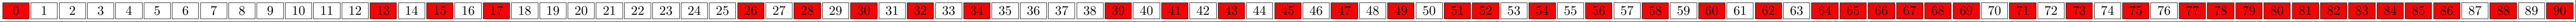

In [48]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstpng2(tkz);

In [49]:
jstalt(tkz);

<path d="M 6.875 -4.78125 C 6.875 -5.96875 6.796875 -7.171875 6.28125 -8.28125 C 5.59375 -9.703125 4.359375 -9.953125 3.734375 -9.953125 C 2.84375 -9.953125 1.75 -9.5625 1.140625 -8.171875 C 0.65625 -7.140625 0.578125 -5.96875 0.578125 -4.78125 C 0.578125 -3.65625 0.640625 -2.3125 1.25 -1.1875 C 1.890625 0.03125 2.984375 0.328125 3.71875 0.328125 C 4.53125 0.328125 5.65625 0.015625 6.3125 -1.40625 C 6.796875 -2.4375 6.875 -3.59375 6.875 -4.78125 Z M 3.71875 0 C 3.140625 0 2.25 -0.375 1.984375 -1.8125 C 1.828125 -2.703125 1.828125 -4.078125 1.828125 -4.953125 C 1.828125 -5.921875 1.828125 -6.90625 1.9375 -7.703125 C 2.21875 -9.484375 3.34375 -9.625 3.71875 -9.625 C 4.21875 -9.625 5.203125 -9.34375 5.484375 -7.875 C 5.625 -7.03125 5.625 -5.90625 5.625 -4.953125 C 5.625 -3.84375 5.625 -2.828125 5.46875 -1.859375 C 5.25 -0.453125 4.390625 0 3.71875 0 Z M 3.71875 0 "/>
 
 
<path d="M 4.390625 -9.5625 C 4.390625 -9.921875 4.390625 -9.953125 4.046875 -9.953125 C 3.125 -9 1.8125 -9 1.328125 -9 L 1.328125 -8.53125 C 1.625 -8.53125 2.515625 -8.53125 3.28125 -8.921875 L 3.28125 -1.1875 C 3.28125 -0.640625 3.234375 -0.46875 1.890625 -0.46875 L 1.421875 -0.46875 L 1.421875 0 C 1.9375 -0.046875 3.234375 -0.046875 3.84375 -0.046875 C 4.4375 -0.046875 5.734375 -0.046875 6.265625 0 L 6.265625 -0.46875 L 5.78125 -0.46875 C 4.4375 -0.46875 4.390625 -0.625 4.390625 -1.1875 Z M 4.390625 -9.5625 "/>
 
 
<path d="M 1.890625 -1.15625 L 3.484375 -2.6875 C 5.8125 -4.75 6.703125 -5.5625 6.703125 -7.046875 C 6.703125 -8.75 5.359375 -9.953125 3.546875 -9.953125 C 1.859375 -9.953125 0.75 -8.578125 0.75 -7.25 C 0.75 -6.40625 1.5 -6.40625 1.53125 -6.40625 C 1.796875 -6.40625 2.3125 -6.59375 2.3125 -7.203125 C 2.3125 -7.59375 2.046875 -7.984375 1.53125 -7.984375 C 1.40625 -7.984375 1.375 -7.984375 1.328125 -7.96875 C 1.671875 -8.9375 2.484375 -9.484375 3.34375 -9.484375 C 4.703125 -9.484375 5.34375 -8.28125 5.34375 -7.046875 C 5.34375 -5.859375 4.59375 -4.671875 3.78125 -3.75 L 0.90625 -0.546875 C 0.75 -0.390625 0.75 -0.359375 0.75 0 L 6.28125 0 L 6.703125 -2.59375 L 6.328125 -2.59375 C 6.265625 -2.15625 6.15625 -1.5 6 -1.265625 C 5.90625 -1.15625 4.921875 -1.15625 4.578125 -1.15625 Z M 1.890625 -1.15625 "/>
 
 
<path d="M 4.328125 -5.265625 C 5.5625 -5.65625 6.421875 -6.703125 6.421875 -7.890625 C 6.421875 -9.109375 5.109375 -9.953125 3.671875 -9.953125 C 2.171875 -9.953125 1.03125 -9.046875 1.03125 -7.921875 C 1.03125 -7.421875 1.359375 -7.140625 1.796875 -7.140625 C 2.25 -7.140625 2.546875 -7.46875 2.546875 -7.90625 C 2.546875 -8.65625 1.859375 -8.65625 1.625 -8.65625 C 2.09375 -9.375 3.078125 -9.578125 3.609375 -9.578125 C 4.234375 -9.578125 5.046875 -9.25 5.046875 -7.90625 C 5.046875 -7.71875 5.015625 -6.859375 4.625 -6.203125 C 4.1875 -5.484375 3.671875 -5.4375 3.296875 -5.421875 C 3.1875 -5.40625 2.828125 -5.375 2.71875 -5.375 C 2.59375 -5.359375 2.5 -5.34375 2.5 -5.203125 C 2.5 -5.03125 2.59375 -5.03125 2.859375 -5.03125 L 3.515625 -5.03125 C 4.734375 -5.03125 5.28125 -4.015625 5.28125 -2.546875 C 5.28125 -0.515625 4.25 -0.09375 3.59375 -0.09375 C 2.953125 -0.09375 1.84375 -0.34375 1.3125 -1.21875 C 1.84375 -1.15625 2.296875 -1.484375 2.296875 -2.046875 C 2.296875 -2.578125 1.890625 -2.890625 1.46875 -2.890625 C 1.109375 -2.890625 0.625 -2.671875 0.625 -2.015625 C 0.625 -0.65625 2.015625 0.328125 3.640625 0.328125 C 5.46875 0.328125 6.828125 -1.03125 6.828125 -2.546875 C 6.828125 -3.78125 5.890625 -4.9375 4.328125 -5.265625 Z M 4.328125 -5.265625 "/>
 
 
<path d="M 4.390625 -2.46875 L 4.390625 -1.171875 C 4.390625 -0.625 4.359375 -0.46875 3.25 -0.46875 L 2.9375 -0.46875 L 2.9375 0 C 3.5625 -0.046875 4.328125 -0.046875 4.953125 -0.046875 C 5.59375 -0.046875 6.375 -0.046875 6.984375 0 L 6.984375 -0.46875 L 6.671875 -0.46875 C 5.578125 -0.46875 5.546875 -0.625 5.546875 -1.171875 L 5.546875 -2.46875 L 7.03125 -2.46875 L 7.03125 -2.921875 L 5.546875 -2.921875 L 5.546875 -9.71875 C 5.546875 -10.015625 5.546875 -10.109375 5.296875 -10.109375 C 5.171875 -10.1

In [51]:
img:=
"""
<picture>
    <source type="image/svg+xml" srcset="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHhtbG5zOnhsaW5rPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIiB3aWR0aD0iNTkuMjc4cHQiIGhlaWdodD0iMjQuNTc0cHQiIHZpZXdCb3g9IjAgMCA1OS4yNzggMjQuNTc0IiB2ZXJzaW9uPSIxLjEiPgo8ZGVmcz4KPGc+CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDAtMCI+CjxwYXRoIHN0eWxlPSJzdHJva2U6bm9uZTsiIGQ9IiIvPgo8L3N5bWJvbD4KPHN5bWJvbCBvdmVyZmxvdz0idmlzaWJsZSIgaWQ9ImdseXBoMC0xIj4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIgZD0iTSA2Ljg3NSAtNC43ODEyNSBDIDYuODc1IC01Ljk2ODc1IDYuNzk2ODc1IC03LjE3MTg3NSA2LjI4MTI1IC04LjI4MTI1IEMgNS41OTM3NSAtOS43MDMxMjUgNC4zNTkzNzUgLTkuOTUzMTI1IDMuNzM0Mzc1IC05Ljk1MzEyNSBDIDIuODQzNzUgLTkuOTUzMTI1IDEuNzUgLTkuNTYyNSAxLjE0MDYyNSAtOC4xNzE4NzUgQyAwLjY1NjI1IC03LjE0MDYyNSAwLjU3ODEyNSAtNS45Njg3NSAwLjU3ODEyNSAtNC43ODEyNSBDIDAuNTc4MTI1IC0zLjY1NjI1IDAuNjQwNjI1IC0yLjMxMjUgMS4yNSAtMS4xODc1IEMgMS44OTA2MjUgMC4wMzEyNSAyLjk4NDM3NSAwLjMyODEyNSAzLjcxODc1IDAuMzI4MTI1IEMgNC41MzEyNSAwLjMyODEyNSA1LjY1NjI1IDAuMDE1NjI1IDYuMzEyNSAtMS40MDYyNSBDIDYuNzk2ODc1IC0yLjQzNzUgNi44NzUgLTMuNTkzNzUgNi44NzUgLTQuNzgxMjUgWiBNIDMuNzE4NzUgMCBDIDMuMTQwNjI1IDAgMi4yNSAtMC4zNzUgMS45ODQzNzUgLTEuODEyNSBDIDEuODI4MTI1IC0yLjcwMzEyNSAxLjgyODEyNSAtNC4wNzgxMjUgMS44MjgxMjUgLTQuOTUzMTI1IEMgMS44MjgxMjUgLTUuOTIxODc1IDEuODI4MTI1IC02LjkwNjI1IDEuOTM3NSAtNy43MDMxMjUgQyAyLjIxODc1IC05LjQ4NDM3NSAzLjM0Mzc1IC05LjYyNSAzLjcxODc1IC05LjYyNSBDIDQuMjE4NzUgLTkuNjI1IDUuMjAzMTI1IC05LjM0Mzc1IDUuNDg0Mzc1IC03Ljg3NSBDIDUuNjI1IC03LjAzMTI1IDUuNjI1IC01LjkwNjI1IDUuNjI1IC00Ljk1MzEyNSBDIDUuNjI1IC0zLjg0Mzc1IDUuNjI1IC0yLjgyODEyNSA1LjQ2ODc1IC0xLjg1OTM3NSBDIDUuMjUgLTAuNDUzMTI1IDQuMzkwNjI1IDAgMy43MTg3NSAwIFogTSAzLjcxODc1IDAgIi8+Cjwvc3ltYm9sPgo8c3ltYm9sIG92ZXJmbG93PSJ2aXNpYmxlIiBpZD0iZ2x5cGgwLTIiPgo8cGF0aCBzdHlsZT0ic3Ryb2tlOm5vbmU7IiBkPSJNIDQuMzkwNjI1IC05LjU2MjUgQyA0LjM5MDYyNSAtOS45MjE4NzUgNC4zOTA2MjUgLTkuOTUzMTI1IDQuMDQ2ODc1IC05Ljk1MzEyNSBDIDMuMTI1IC05IDEuODEyNSAtOSAxLjMyODEyNSAtOSBMIDEuMzI4MTI1IC04LjUzMTI1IEMgMS42MjUgLTguNTMxMjUgMi41MTU2MjUgLTguNTMxMjUgMy4yODEyNSAtOC45MjE4NzUgTCAzLjI4MTI1IC0xLjE4NzUgQyAzLjI4MTI1IC0wLjY0MDYyNSAzLjIzNDM3NSAtMC40Njg3NSAxLjg5MDYyNSAtMC40Njg3NSBMIDEuNDIxODc1IC0wLjQ2ODc1IEwgMS40MjE4NzUgMCBDIDEuOTM3NSAtMC4wNDY4NzUgMy4yMzQzNzUgLTAuMDQ2ODc1IDMuODQzNzUgLTAuMDQ2ODc1IEMgNC40Mzc1IC0wLjA0Njg3NSA1LjczNDM3NSAtMC4wNDY4NzUgNi4yNjU2MjUgMCBMIDYuMjY1NjI1IC0wLjQ2ODc1IEwgNS43ODEyNSAtMC40Njg3NSBDIDQuNDM3NSAtMC40Njg3NSA0LjM5MDYyNSAtMC42MjUgNC4zOTA2MjUgLTEuMTg3NSBaIE0gNC4zOTA2MjUgLTkuNTYyNSAiLz4KPC9zeW1ib2w+CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDAtMyI+CjxwYXRoIHN0eWxlPSJzdHJva2U6bm9uZTsiIGQ9Ik0gMS44OTA2MjUgLTEuMTU2MjUgTCAzLjQ4NDM3NSAtMi42ODc1IEMgNS44MTI1IC00Ljc1IDYuNzAzMTI1IC01LjU2MjUgNi43MDMxMjUgLTcuMDQ2ODc1IEMgNi43MDMxMjUgLTguNzUgNS4zNTkzNzUgLTkuOTUzMTI1IDMuNTQ2ODc1IC05Ljk1MzEyNSBDIDEuODU5Mzc1IC05Ljk1MzEyNSAwLjc1IC04LjU3ODEyNSAwLjc1IC03LjI1IEMgMC43NSAtNi40MDYyNSAxLjUgLTYuNDA2MjUgMS41MzEyNSAtNi40MDYyNSBDIDEuNzk2ODc1IC02LjQwNjI1IDIuMzEyNSAtNi41OTM3NSAyLjMxMjUgLTcuMjAzMTI1IEMgMi4zMTI1IC03LjU5Mzc1IDIuMDQ2ODc1IC03Ljk4NDM3NSAxLjUzMTI1IC03Ljk4NDM3NSBDIDEuNDA2MjUgLTcuOTg0Mzc1IDEuMzc1IC03Ljk4NDM3NSAxLjMyODEyNSAtNy45Njg3NSBDIDEuNjcxODc1IC04LjkzNzUgMi40ODQzNzUgLTkuNDg0Mzc1IDMuMzQzNzUgLTkuNDg0Mzc1IEMgNC43MDMxMjUgLTkuNDg0Mzc1IDUuMzQzNzUgLTguMjgxMjUgNS4zNDM3NSAtNy4wNDY4NzUgQyA1LjM0Mzc1IC01Ljg1OTM3NSA0LjU5Mzc1IC00LjY3MTg3NSAzLjc4MTI1IC0zLjc1IEwgMC45MDYyNSAtMC41NDY4NzUgQyAwLjc1IC0wLjM5MDYyNSAwLjc1IC0wLjM1OTM3NSAwLjc1IDAgTCA2LjI4MTI1IDAgTCA2LjcwMzEyNSAtMi41OTM3NSBMIDYuMzI4MTI1IC0yLjU5Mzc1IEMgNi4yNjU2MjUgLTIuMTU2MjUgNi4xNTYyNSAtMS41IDYgLTEuMjY1NjI1IEMgNS45MDYyNSAtMS4xNTYyNSA0LjkyMTg3NSAtMS4xNTYyNSA0LjU3ODEyNSAtMS4xNTYyNSBaIE0gMS44OTA2MjUgLTEuMTU2MjUgIi8+Cjwvc3ltYm9sPgo8L2c+CjxjbGlwUGF0aCBpZD0iY2xpcDEiPgogIDxwYXRoIGQ9Ik0gMCAwIEwgNTkuMjc3MzQ0IDAgTCA1OS4yNzczNDQgMjQuNTc0MjE5IEwgMCAyNC41NzQyMTkgWiBNIDAgMCAiLz4KPC9jbGlwUGF0aD4KPC9kZWZzPgo8ZyBpZD0ic3VyZmFjZTEiPgo8ZyBjbGlwLXBhdGg9InVybCgjY2xpcDEpIiBjbGlwLXJ1bGU9Im5vbnplcm8iPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjEyO3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIC0yOS42MzkgLTEyLjI4NzIxOSBMIDI5LjYzODM0NCAtMTIuMjg3MjE5IEwgMjkuNjM4MzQ0IDEyLjI4NyBMIC0yOS42MzkgMTIuMjg3IFogTSAtMjkuNjM5IC0xMi4yODcyMTkgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwyOS42MzksMTIuMjg3KSIvPgo8L2c+CjxwYXRoIHN0eWxlPSJmaWxsLXJ1bGU6bm9uemVybztmaWxsOnJnYigxMDAlLDAlLDAlKTtmaWxsLW9wYWNpdHk6MTtzdHJva2Utd2lkdGg6MC4xMjtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA4LjIxNzc4MSA5LjI5ODcxOSBMIC04LjIxOTcxOSA5LjI5ODcxOSBMIC04LjIxOTcxOSAtOS4yOTg5MzcgTCA4LjIxNzc4MSAtOS4yOTg5MzcgWiBNIDguMjE3NzgxIDkuMjk4NzE5ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTEuMjA4LDEyLjI4NykiLz4KPGcgc3R5bGU9ImZpbGw6cmdiKDAlLDAlLDAlKTtmaWxsLW9wYWNpdHk6MTsiPgogIDx1c2UgeGxpbms6aHJlZj0iI2dseXBoMC0xIiB4PSI3LjQ3MiIgeT0iMTcuMTAyIi8+CjwvZz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4xMjtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA4LjIyMDM3NSA5LjI5ODcxOSBMIC04LjIyMTAzMSA5LjI5ODcxOSBMIC04LjIyMTAzMSAtOS4yOTg5MzcgTCA4LjIyMDM3NSAtOS4yOTg5MzcgWiBNIDguMjIwMzc1IDkuMjk4NzE5ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMjkuNjM5LDEyLjI4NykiLz4KPGcgc3R5bGU9ImZpbGw6cmdiKDAlLDAlLDAlKTtmaWxsLW9wYWNpdHk6MTsiPgogIDx1c2UgeGxpbms6aHJlZj0iI2dseXBoMC0yIiB4PSIyNS45MDMiIHk9IjE3LjEwMiIvPgo8L2c+CjxwYXRoIHN0eWxlPSJmaWxsLXJ1bGU6bm9uemVybztmaWxsOnJnYigxMDAlLDAlLDAlKTtmaWxsLW9wYWNpdHk6MTtzdHJva2Utd2lkdGg6MC4xMjtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA4LjIxOTA2MiA5LjI5ODcxOSBMIC04LjIxODQzOCA5LjI5ODcxOSBMIC04LjIxODQzOCAtOS4yOTg5MzcgTCA4LjIxOTA2MiAtOS4yOTg5MzcgWiBNIDguMjE5MDYyIDkuMjk4NzE5ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsNDguMDcsMTIuMjg3KSIvPgo8ZyBzdHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyI+CiAgPHVzZSB4bGluazpocmVmPSIjZ2x5cGgwLTMiIHg9IjQ0LjMzNCIgeT0iMTcuMTAyIi8+CjwvZz4KPC9nPgo8L3N2Zz4K">
    <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAFIAAAASCAMAAAD/qnnFAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAByUExURf///wAAAHcAAJgAAIQAAAAAAAAAAIQAAIYAAG0AAKsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP8AAH4AAKkAAHIAAP8AALsAAKoAAJkAAHcAAMwAAEQAAGYAAN0AAO4AAIgAAFUAAP///5R3bf4AAAAZdFJOUwBEP6evIlVpjnXNEXe7ZjOZiKrM3REgMFtUkAZ9AAAAAWJLR0QAiAUdSAAAAAlwSFlzAAAASAAAAEgARslrPgAAAAd0SU1FB+gIHRAMD4TsBiEAAAEBSURBVDjLtdRhc8IgDAbgZF1xru3QrW4jBRXw//9GmR4J7PSuH9p84/Le01A4AGHhQliFfGm4XqFFLlUvnsc20nm7k1vDReXQWC+exxrpvK9LEpFku74gUSkhabIl2QvpyNbk0Rp75CwOQn5o2GEmyZmTxEANQp6dr0lHf3HOFmSacb/nKb05eY61uiBvu5xHpvpsmQwxysYRCtIaF2aTvS6Px005pruSTJ1YkZHMFB+TSoPOZJrR8Zc14pfOZExT2ooM7jZ33tGoOv6X4zDI8Uzh4ovjGZn0FM7h372kWfcyPIo10ln5qi9LHrZS0Ml7gPXiW1KbuvMjnd/VHrelySuUSS2dSY/1OgAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyNC0wOC0yOVQxNjoxMjoxNSswMDowMDbYaAEAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjQtMDgtMjlUMTY6MTI6MTUrMDA6MDBHhdC9AAAAKHRFWHRkYXRlOnRpbWVzdGFtcAAyMDI0LTA4LTI5VDE2OjEyOjE1KzAwOjAwEJDxYgAAABN0RVh0cGRmOlZlcnNpb24AUERGLTEuNVM2WsEAAAAASUVORK5CYII=" alt="">
</picture>
""";;
Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));

In [52]:
jst:=function(tikz)
    local tmpdir, fn, header, ltx, svgfile, stream, svgdata, tojupyter, hasbp, img, b64file;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ",
                    svgfile, "; base64 -i ", svgfile," >> ", b64file );

    else 
        ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ",
                    svgfile);
    fi;
    Exec( ltx );
    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                            data := "No svg was created; pdf2svg is installed in your system?", metadata := rec());
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;
    if ARCH_IS_MAC_OS_X() then 
        stream := InputTextFile( b64file );
        if stream <> fail then
            svgdata := ReadLine( stream );
            CloseStream( stream );
        else
            tojupyter := rec( json := true, name := "stdout",
                                data := Concatenation( "Unable to render ", tikz ), metadata := rec() );
            return JupyterRenderable(tojupyter.data, tojupyter.metadata);
        fi;
    else
        stream := InputTextFile( svgfile );
        if stream <> fail then
            svgdata := ReadAll( stream );
            svgdata:= SubstitutionSublist(Base64String(svgdata),"\n","");
            CloseStream( stream );
        else
            tojupyter := rec( json := true, name := "stdout",
                                data := Concatenation( "Unable to render ", tikz ), metadata := rec() );
            return JupyterRenderable(tojupyter.data, tojupyter.metadata);
        fi;
    fi;

    img:=Concatenation("<img src='data:image/svg+xml;base64,", svgdata,"' alt='TikZ Output'>");
    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end

In [57]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jst(tkz);

In [58]:
jstalt:= function(tikz)
    local tmpdir, fn, header, ltx, svgdata, svgdata64, svgfile, stream, tojupyter, hasbp, img, b64file, b64cmd;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; pdf2svg is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata64:= ReadAll( stream );
    CloseStream( stream );
    stream := InputTextFile( svgfile );
    svgdata:= ReadAll( stream );
    svgdata:=svgdata{[PositionSublist(svgdata,"<svg")..Length(svgdata)]};
    #PrintFormattedString(svgdata);
    CloseStream( stream );

    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"'>"); testing separately
    #img:=Concatenation("<img src='data:image/png;base64,",pngdata,"'>");
    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"' onerror=\"this.src='data:image/png;base64,",pngdata,"'\"     alt='TikZ picture'>"); #onerror does not work on github
    img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata64,"' srcset='data:image/svg+xml;ascii,",svgdata,"' alt='TikZ picture'>");

    tojupyter := rec( json := true, source := "gap",
                                  data := rec( ( "image/svg+xml" ) := svgdata ),
                                  metadata := rec( ( "image/svg+xml" ) := rec( width := 500, height := 500 ) ) );
                        
    return JupyterRenderable(tojupyter.data, tojupyter.metadata);
end;

function( tikz ) ... end

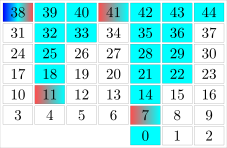

In [63]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstalt(tkz);

Yet another alternative with png

In [64]:
jstpng:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, stream, pngdata, tojupyter, hasbp, img, b64file, b64cmd, dims, dimsfile, pdffile, dimx;

    hasbp:=PositionSublist(tikz,"begin[border=2pt]{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz,border=2pt]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    pdffile:=Concatenation(fn, ".pdf");
    if not( IsExistingFile( pdffile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        Info(InfoWarning,1,"No pdf was created; pdflatex is installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    dimsfile:=Concatenation(fn, "-dims.txt");
    ltx:=Concatenation("pdfinfo ",pdffile," | grep \"Page size\" > ",dimsfile);
    Exec(ltx);
    if not( IsExistingFile( dimsfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "pdfinfo missing in your system",metadata:=rec() );
        Info(InfoWarning,1,"No pdf was created; pdflatex is installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    stream := InputTextFile( dimsfile );
    dims:= ReadAll( stream );
    NormalizeWhitespace(dims);
    CloseStream( stream );
    dimx:=Float(NormalizedWhitespace(dims{[PositionSublist(dims,": ")+2..PositionSublist(dims," x")]}));

    pngfile := Concatenation( fn, ".png" );
    ltx := Concatenation( "pdftoppm -r 300 -png ", pdffile, " > ", pngfile);
    Exec( ltx );
    
    if not( IsExistingFile( pngfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No png was created; pdftoppm is installed in your system?",metadata:=rec() );
        Info(InfoWarning,1,"No png was created; are convert and pdftoppm installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, pngfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    pngdata:= ReadAll( stream );
    CloseStream( stream );


    img:=Concatenation("\n <img src='data:image/png;base64,",pngdata,"' style=\"width:",String(dimx),"px;\" >");

    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec( ) ));
end;

function( tikz ) ... end


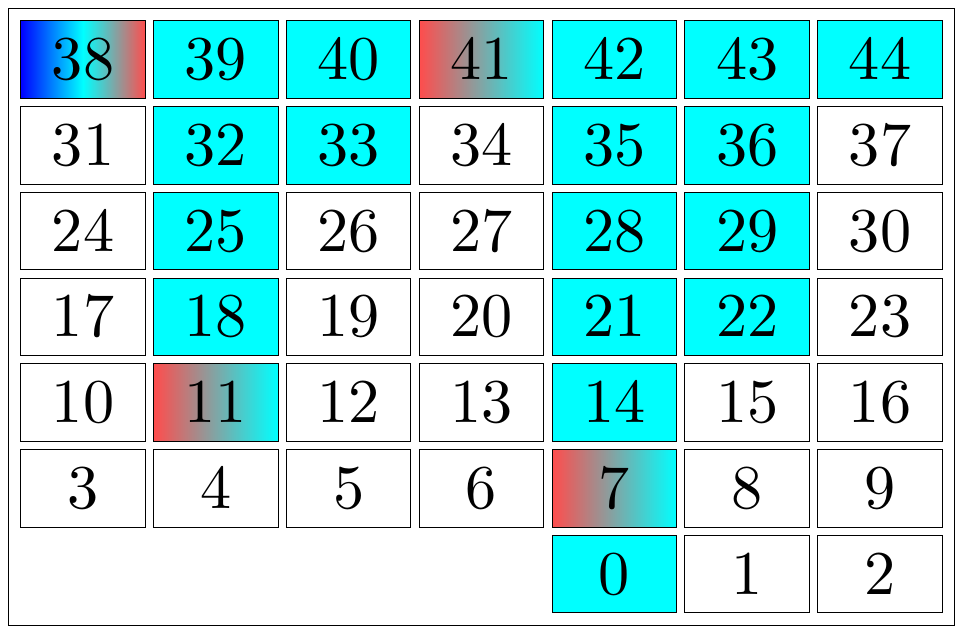

In [69]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstpng(tkz);


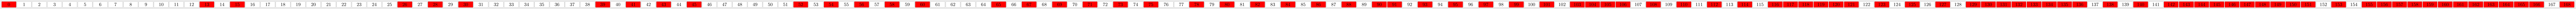

In [72]:
ns:=NumericalSemigroup(13,15);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstpng(tkz);


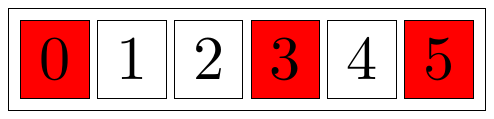

In [75]:
ns:=NumericalSemigroup(3,5,7);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstpng(tkz);


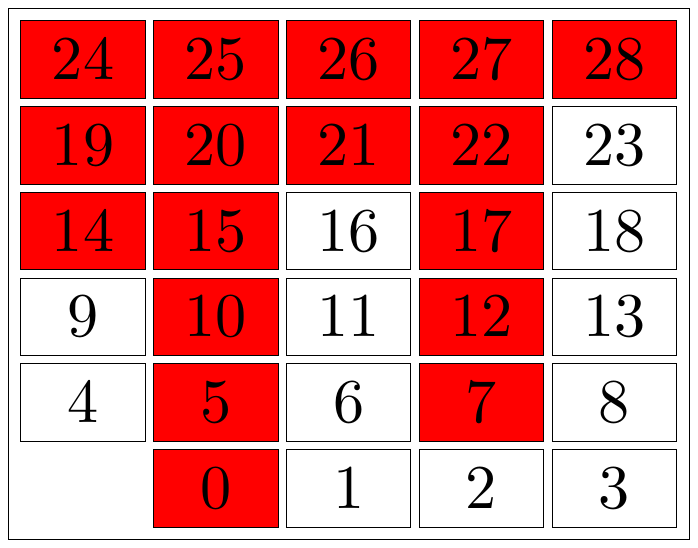

In [79]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
jstpng(tkz);

In [88]:
jstpngfb:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, stream, pngdata, svgdata, svgfile, tojupyter, hasbp, img, b64file, b64cmd, dims, dimsfile, pdffile, dimx;

    hasbp:=PositionSublist(tikz,"begin[border=2pt]{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz,border=2pt]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    pdffile:=Concatenation(fn, ".pdf");
    if not( IsExistingFile( pdffile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        Info(InfoWarning,1,"No pdf was created; is pdflatex installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    dimsfile:=Concatenation(fn, "-dims.txt");
    ltx:=Concatenation("pdfinfo ",pdffile," | grep \"Page size\" > ",dimsfile);
    Exec(ltx);
    if not( IsExistingFile( dimsfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "pdfinfo missing in your system",metadata:=rec() );
        Info(InfoWarning,1,"No pdf was created; is pdfinfo installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    stream := InputTextFile( dimsfile );
    dims:= ReadAll( stream );
    NormalizeWhitespace(dims);
    CloseStream( stream );
    dimx:=Float(NormalizedWhitespace(dims{[PositionSublist(dims,": ")+2..PositionSublist(dims," x")]}));

    pngfile := Concatenation( fn, ".png" );
    ltx := Concatenation( "pdftoppm -r 300 -png ", pdffile, " > ", pngfile);
    Exec( ltx );
    
    if not( IsExistingFile( pngfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No png was created; pdftoppm is installed in your system?",metadata:=rec() );
        Info(InfoWarning,1,"No png was created; are convert and pdftoppm installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; is pdf2svg installed in your system?",metadata:=rec() );
        Info(InfoWarning,1,"No svg was created; is pdf2svg installed in your system?");
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, pngfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    pngdata:= ReadAll( stream );
    CloseStream( stream );

    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata:= ReadAll( stream );
    CloseStream( stream );


    img:=Concatenation("\n <img srcset='data:image/svg+xml;base64,",svgdata,"' src='data:image/png;base64,",pngdata,"' style=\"width:",String(dimx),"px;\" >");

    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec( ) ));
end;

function( tikz ) ... end


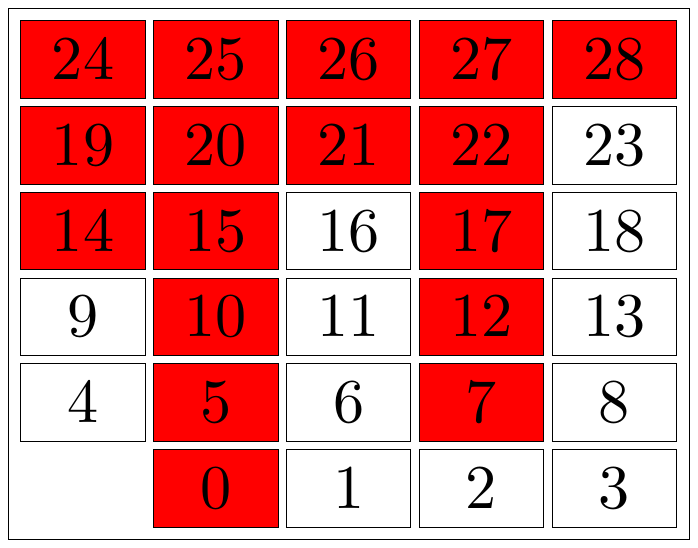

In [92]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
jstpngfb(tkz);